# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

(Please insert the background here )

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

To visualize what exactly you get from the `request.get`, we can use .content to see what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js"></script><script async defer src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" '

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

In [4]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<html lang="en">
 <head>
  <script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js">
  </script>
  <script async="" defer="" src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992">
  </script>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="/favicon.ico" rel="shortcut icon"/>
  <link href="/OpensearchDescription.xml" rel="search" type="applica


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [5]:
table = soup.find('tbody')
print(table.prettify()[1:500])

tbody>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2022-10-02
  </th>
  <td class="text-center">
   $158,410,068,981
  </td>
  <td class="text-center">
   $5,052,407,841
  </td>
  <td class="text-center">
   $1,311.26
  </td>
  <td class="text-center">
   N/A
  </td>
 </tr>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2022-10-01
  </th>
  <td class="text-center">
   $160,462,955,554
  </td>
  <td class="text-center">
   $11,849,125,784
  </td>
  <td class="tex


In [6]:
table.find_all('th', attrs={'class':'font-semibold text-center'})[:10]

[<th class="font-semibold text-center" scope="row">2022-10-02</th>,
 <th class="font-semibold text-center" scope="row">2022-10-01</th>,
 <th class="font-semibold text-center" scope="row">2022-09-30</th>,
 <th class="font-semibold text-center" scope="row">2022-09-29</th>,
 <th class="font-semibold text-center" scope="row">2022-09-28</th>,
 <th class="font-semibold text-center" scope="row">2022-09-27</th>,
 <th class="font-semibold text-center" scope="row">2022-09-26</th>,
 <th class="font-semibold text-center" scope="row">2022-09-25</th>,
 <th class="font-semibold text-center" scope="row">2022-09-24</th>,
 <th class="font-semibold text-center" scope="row">2022-09-23</th>]

In [7]:
table.find_all('th', attrs={'class':'font-semibold text-center'})[0].text

'2022-10-02'

Finding row length.

In [8]:
row = table.find_all('th', attrs={'class':'font-semibold text-center'})
row_length = len(row)
row_length

31

In [9]:
row2 = table.find_all('td', attrs={'class':'text-center'})
row_length2 = len(row2)
row_length2

124

Do the scrapping process here (please change this markdown with your explanation)

In [10]:
#temp = []

#initiating a tuple

#for i in range(0, row_length):

    #scrapping process
    #Date = table.find_all('th', attrs={'class':'font-semibold text-center'})[i].text
    
    #temp.append((Date))
    
#temp

In [11]:
temp = []

date = []
market_cap = []
volume = []
open = []
close = []

# get date
for i in range(0, row_length):
    Date = table.find_all('th', attrs={'class':'font-semibold text-center'})[i].text
    date.append(Date)
    
# get Market Cap  
for i in range(0, row_length2,4):
    Market_Cap = table.find_all('td', attrs={'class':'text-center'})[i].text
    Market_Cap = Market_Cap.strip()
    market_cap.append(Market_Cap)

# get Volume
for i in range(1, row_length2,4):
    Volume = table.find_all('td', attrs={'class':'text-center'})[i].text
    Volume = Volume.strip()
    volume.append(Volume) 

# get Open
for i in range(2, row_length2,4):
    Open = table.find_all('td', attrs={'class':'text-center'})[i].text
    Open = Open.strip()
    open.append(Open)

# get Close
for i in range(3, row_length2,4):
    Close = table.find_all('td', attrs={'class':'text-center'})[i].text
    Close = Close.strip()
    close.append(Close)

#scrapping process
    temp.append((Date,Market_Cap,Volume,Open,Close))
temp   

[('2022-09-02', '$191,078,487,040', '$15,076,286,517', '$1,588.98', 'N/A'),
 ('2022-09-02',
  '$191,078,487,040',
  '$15,076,286,517',
  '$1,588.98',
  '$1,311.26'),
 ('2022-09-02',
  '$191,078,487,040',
  '$15,076,286,517',
  '$1,588.98',
  '$1,329.15'),
 ('2022-09-02',
  '$191,078,487,040',
  '$15,076,286,517',
  '$1,588.98',
  '$1,335.74'),
 ('2022-09-02',
  '$191,078,487,040',
  '$15,076,286,517',
  '$1,588.98',
  '$1,340.02'),
 ('2022-09-02',
  '$191,078,487,040',
  '$15,076,286,517',
  '$1,588.98',
  '$1,331.15'),
 ('2022-09-02',
  '$191,078,487,040',
  '$15,076,286,517',
  '$1,588.98',
  '$1,335.12'),
 ('2022-09-02',
  '$191,078,487,040',
  '$15,076,286,517',
  '$1,588.98',
  '$1,294.08'),
 ('2022-09-02',
  '$191,078,487,040',
  '$15,076,286,517',
  '$1,588.98',
  '$1,318.10'),
 ('2022-09-02',
  '$191,078,487,040',
  '$15,076,286,517',
  '$1,588.98',
  '$1,329.56'),
 ('2022-09-02',
  '$191,078,487,040',
  '$15,076,286,517',
  '$1,588.98',
  '$1,330.79'),
 ('2022-09-02',
  '$191,

## Creating data frame & Data wrangling

Put the array into dataframe

In [12]:
table2 = soup.find('div', attrs={'class':'card-block'})
print(table.prettify()[1:500])

tbody>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2022-10-02
  </th>
  <td class="text-center">
   $158,410,068,981
  </td>
  <td class="text-center">
   $5,052,407,841
  </td>
  <td class="text-center">
   $1,311.26
  </td>
  <td class="text-center">
   N/A
  </td>
 </tr>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2022-10-01
  </th>
  <td class="text-center">
   $160,462,955,554
  </td>
  <td class="text-center">
   $11,849,125,784
  </td>
  <td class="tex


In [13]:
columns = [th.text for th in table2.find('thead').find_all("th")]
columns

['Date', 'Market Cap', 'Volume', 'Open', 'Close']

In [14]:
import pandas as pd

df = pd.DataFrame({
    columns[0] : Date,
    columns[1] : market_cap,
    columns[2] : volume,
    columns[3] : open,
    columns[4] : close
})
df.head()

,Date,Market Cap,Volume,Open,Close
0,2022-09-02,"$158,410,068,981","$5,052,407,841","$1,311.26",N/A
1,2022-09-02,"$160,462,955,554","$11,849,125,784","$1,329.15","$1,311.26"
2,2022-09-02,"$161,267,455,734","$11,834,328,252","$1,335.74","$1,329.15"
3,2022-09-02,"$161,716,193,676","$16,571,161,476","$1,340.02","$1,335.74"
4,2022-09-02,"$160,800,122,125","$16,685,874,856","$1,331.15","$1,340.02"


In [15]:
def delete_dollar(x):
    for i in x:
        xx = i.split('$')
        return int(xx[1].replace(',',''))
    
def delete_dollar_2(x):
    for i in x:
        if i == 'N/A':
            return 'N/A'
        else:
            xx = i.split('$')
            return float(xx[1].replace(',',''))

Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [16]:
df.dtypes


Date          object
Market Cap    object
Volume        object
Open          object
Close         object
dtype: object

In [17]:
df2 = pd.DataFrame({
    columns[0] : date,
    columns[2] : volume, 
})

df2['Volume'] = df2[['Volume']].apply(delete_dollar,axis=1)
df2.set_index('Date')

,Volume
Date,
2022-10-02,5052407841
2022-10-01,11849125784
2022-09-30,11834328252
2022-09-29,16571161476
2022-09-28,16685874856
2022-09-27,15270197376
2022-09-26,10552647870
2022-09-25,11251326609
2022-09-24,17599766731


Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

In [18]:
df2['Date']=df2['Date'].astype('datetime64')

In [19]:
df2['Volume']=df2['Volume'].astype('int64')

In [20]:
df2.dtypes

Date      datetime64[ns]
Volume             int64
dtype: object

In [21]:
df2.head(30)

,Date,Volume
0,2022-10-02,5052407841
1,2022-10-01,11849125784
2,2022-09-30,11834328252
3,2022-09-29,16571161476
4,2022-09-28,16685874856
5,2022-09-27,15270197376
6,2022-09-26,10552647870
7,2022-09-25,11251326609
8,2022-09-24,17599766731
9,2022-09-23,17517188721


In [22]:
df2 = df2[::-1]
df2

,Date,Volume
30,2022-09-02,15076286517
29,2022-09-03,15857654357
28,2022-09-04,8500114334
27,2022-09-05,7827505125
26,2022-09-06,11815125729
25,2022-09-07,20860201644
24,2022-09-08,18560005397
23,2022-09-09,16676188643
22,2022-09-10,19418675071
21,2022-09-11,12521808521


In [23]:
df2 = df2.set_index('Date')

In [24]:
import matplotlib.pyplot as plt
import matplotlib.ticker
plt.style.use('seaborn')


C:\Users\GUESS WHO\AppData\Local\Temp\ipykernel_20268\2026618638.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<AxesSubplot: title={'center': '        Daily ETH Volume Traded 2 September 2022 - 2 October 2022'}, xlabel='Day', ylabel='Daily ETH Volume'>

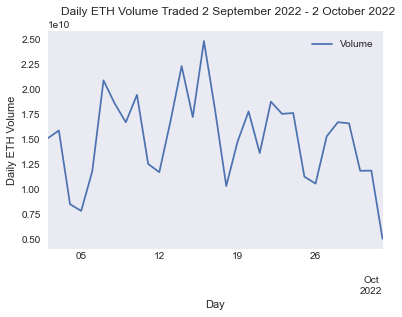

In [25]:
df2.plot(kind='line',
        ylabel='Daily ETH Volume',
        xlabel='Day',
        title='\
        Daily ETH Volume Traded 2 September 2022 - 2 October 2022',
        grid=False,
        rot=0)

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

Based on the graph, we can see that Daily ETH Volume traded from 2 September 2022 - 2 October 2022 is ranging between 5 billion to 24,8 billion USD.


(Put your analysis and conclusion here.)

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.